<a target="_blank" href="https://colab.research.google.com/github/ProgrammierenNachOFI/Preiselastizitaet/blob/main/docs/preiselastizitaet_muloe.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Preiselastizitaet der Nachfrage

Oft wird die Preiselastizität der Nachfrage ($\eta_{Q,P}$) mit der Steigung der
Nachfragekurve gleichgesetzt. Auch wenn die Steigung der Nachfragekurve
einen Anhaltspunkt für die Preiselastizität der Nachfrage darstellt, ist
diese Gleichsetzung unzutreffend.

In der folgenden Zelle werden die für dieses Notebook erforderlichen
Libraries geladen.

In [1]:
# Import der erforderlichen Libraries
import numpy as np
import matplotlib.pyplot as plt

## Unauffällige Nachfragekurve

Um zu zeigen, dass die Steigung der Nachfragekurve nicht das gleiche ist
wie die Preiselastizität der Nachfrage, zeichnen wir als erstes eine
unauffällige Nachfragekurve, das heisst, eine Nachfragekurve mit einer
Steigung von -1.

x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
y: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


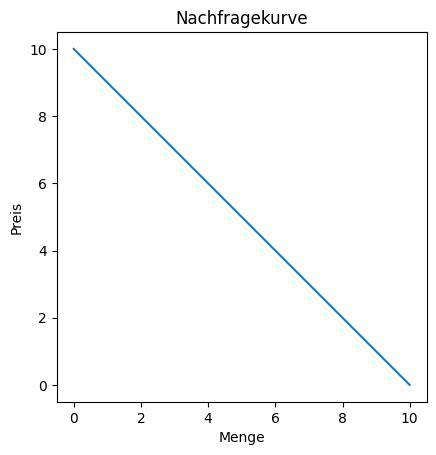

In [2]:
# Datensatz für den Plot der Nachfragekurve
x = [i for i in range(11)]
y = [i * -1 + 10 for i in x]
print(f'x: {x} \ny: {y}')

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Nachfragekurve")
plt.xlabel("Menge")
plt.ylabel("Preis")
ax.set_aspect('equal')
plt.show()

### Preiselastizität der Nachfrage an verschiedenen Stellen

Die Steigung der Nachfragekurve ist im Fall einer linearen Kurve entlang
der ganzen Kurve konstant.
Falls die Steigung der Nachfragekurve und die Preiselastizität der
Nachfrage das Gleiche sind, muss die Preiselstizität der Nachfrage
ebenfalls entlang der ganzen Nachfragekurve konstant sein.

Um dies zu prüfen, wird die Preiselastizität der Nachfrage an drei
verschiedenen Stellen entlang der Nachfragekurve berechnet.

Die Berechnung erfolgt dabei nach der Mittelwertmethode:

$$\eta_{Q,P} = \frac{\frac{Q_2-Q_1}{\frac{Q_2+Q_1}{2}}}{\frac{P_2-P_1}{\frac{P_2+P_1}{2}}}$$

Es soll die $\eta_{Q,P}$ für eine Preissteigerung von
- 8 auf 9,
- 4.5 auf 5.5 sowie
- 1 auf zwei
  
berechnet werden.

Damit Sie sich im weiteren Verlauf dieses Notebooks Schreibarbeit sparen
können, schreiben Sie eine Funktion `get_eta(starting_price)`, welche
die $\eta_{Q,P}$ berechnet.

In [8]:
def _get_q(price):
    return 10 - price

def get_eta(starting_price):
    p1 = starting_price
    p2 = p1 + 1
    q1 = _get_q(p1)
    q2 = _get_q(p2)
    
    return ((q2-q1)/((q1+q2)/2))/((p2-p1)/((p1+p2)/2))

In [13]:
print(f'eta für 8 ist {get_eta(8)}')
print(f'eta für 4.5 ist {get_eta(4.5)}')
print(f'eta für 1 ist {get_eta(1)}')

eta für 8 ist -5.666666666666666
eta für 4.5 ist -1.0
eta für 1 ist -0.17647058823529413


Diese drei Berechnungen zeigen, dass $\eta_{Q,P}$ sich entlang der
Nachfragekurve verändert.

### Visualisierung des Resultates

Möglicherweise kann bereits aufgrund dieser drei Resultate gesagt
werden, welcher Zusammenhang zwischen der Preiselastizität der Nachfrage
und der Nachfragekurve besteht. In der Regel ist es allerdings
einfacher, die Daten zu visualisieren und dann zu beschreiben, was man sieht.

Plotten Sie als nächstes $\eta_{Q,P}$ gegen den Preis.

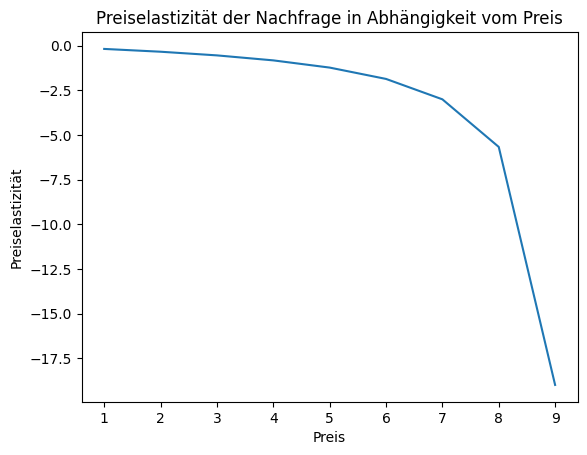

In [22]:
p = [i for i in range(1,10)]
eta = [get_eta(i) for i in p]

fig, ax = plt.subplots()
ax.plot(p, eta)
plt.xlabel("Preis")
plt.ylabel("Preiselastizität")
plt.title("Preiselastizität der Nachfrage in Abhängigkeit vom Preis")
plt.show()

Aus dem Plot ist ersichtlich, dass die Nachfrage bei steigenden Preisen
immer elastischer reagiert.

### Steigung der Nachfragekurve

Es bleibt zu klären, welcher Zusammenhang zwischen der Steigung der
Nachfragekurve und der Preiselastizität der Nachfrage besteht.

Als nächstes wird daher über die unauffällige Nachfragekurve von oben
eine steiler und eine weniger steile Kurve geplottet.

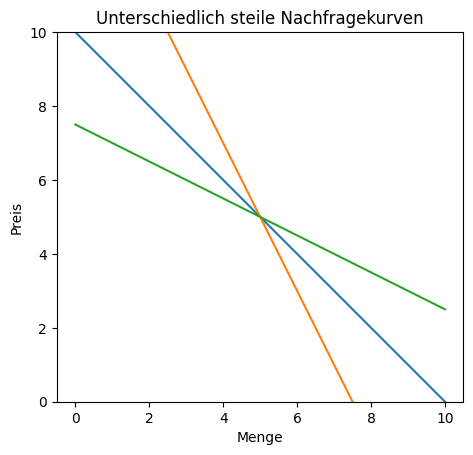

In [7]:
fix, ax = plt.subplots()
ys = [-2*i+15 for i in x]
yf = [-0.5 * i + 7.5 for i in x]
ax.plot(x, y)
ax.plot(x, ys)
ax.plot(x, yf)
plt.ylim([0,10])
ax.set_aspect('equal')
plt.ylabel('Preis')
plt.xlabel('Menge')
plt.title('Unterschiedlich steile Nachfragekurven')
plt.show()

Welche Werte hat die Preiselastizität der Nachfrage entlang der
verschiedenen Nachfragekurven?

Damit diese Frage effizient beantwortet werden kann, muss die Funktion
`get_eta()` so angepasst werden, dass Sie neben dem Preis auch noch die
Funktion der Nachfragekurve entgegennimmt.

In [13]:
def _get_q2(price, f):
    return f(price)

def get_eta2(starting_price, f):
    p1 = starting_price
    p2 = p1 + 1
    q1 = _get_q2(p1, f)
    q2 = _get_q2(p2, f)
    
    return ((q2-q1)/((q1+q2)/2))/((p2-p1)/((p1+p2)/2))

In [11]:
def f(y):
    return 10-y

def f_steil(y):
    return -((y-15)/2)

def f_flach(y):
    return 15 - 2 * y

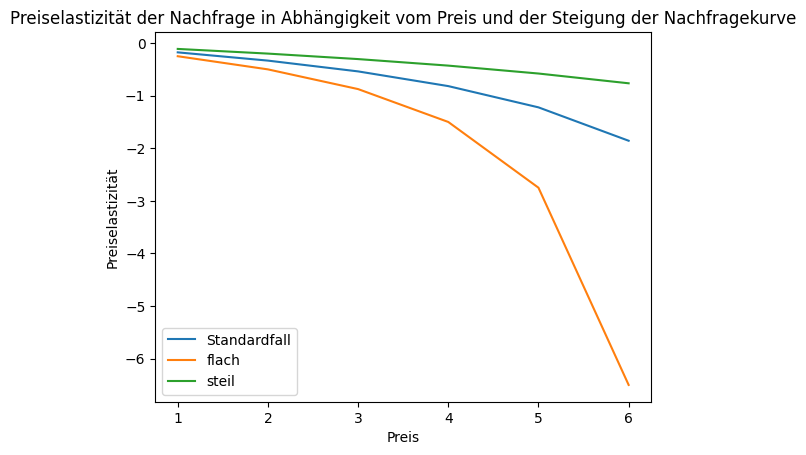

In [24]:
p = [i for i in range(1,7)]
eta = [get_eta2(i, f) for i in p]
eta_steil = [get_eta2(i, f_steil) for i in p]
eta_flach = [get_eta2(i, f_flach) for i in p]

fig, ax = plt.subplots()
ax.plot(p, eta, label="Standardfall")
ax.plot(p, eta_flach, label="flach")
ax.plot(p, eta_steil, label="steil")
plt.legend()
plt.xlabel("Preis")
plt.ylabel("Preiselastizität")
plt.title("Preiselastizität der Nachfrage in Abhängigkeit vom Preis und der Steigung der Nachfragekurve")
plt.show()


Aus den Plots der Entwicklung der Preiselastizität der Nachfrage wird
ersichtlich, dass $\eta_{Q,P}$ für jeden beliebigen Preis stärker
negativ ist, je flacher die Kurve.

In diesem Sinn gilt die Aussage, eine flache Nachfragekurve steht für
ein grosse Preiselastizität der Nachfrage.